In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
Sales=pd.read_csv("advertising.csv")
Sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
Sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
Sales.isnull().sum()/Sales.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

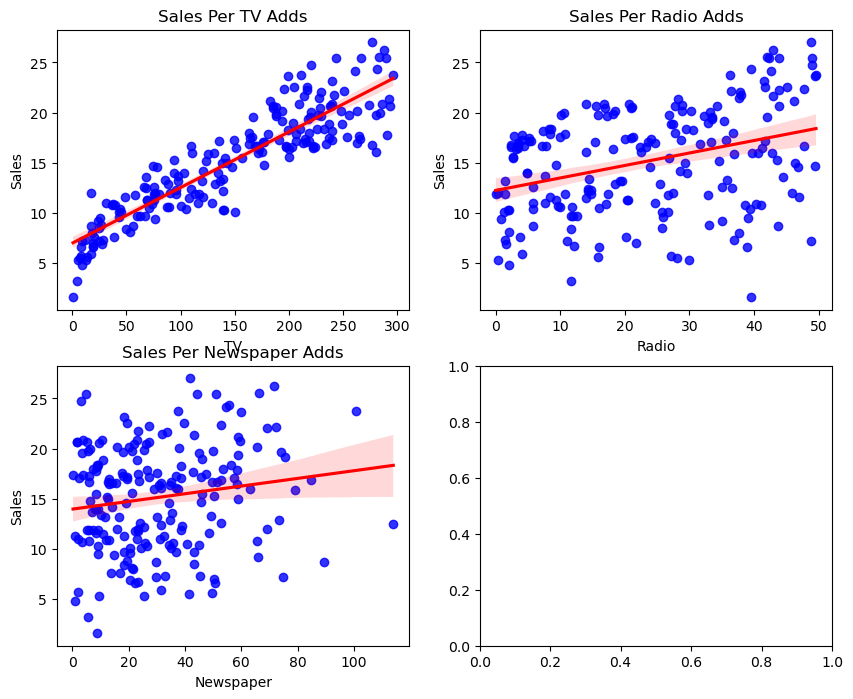

In [22]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
#line_kws parameter is used to set the line color to red, while the scatter_kws
sns.regplot(x='TV',y='Sales',data=Sales,ax=ax[0][0],line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
ax[0][0].set_xlabel('TV')
ax[0][0].set_ylabel('Sales')
ax[0][0].set_title('Sales Per TV Adds')

sns.regplot(x='Radio',y='Sales',data=Sales,ax=ax[0][1],line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
ax[0][1].set_xlabel('Radio')
ax[0][1].set_ylabel('Sales')
ax[0][1].set_title('Sales Per Radio Adds')

sns.regplot(x='Newspaper',y='Sales',data=Sales,ax=ax[1][0],line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
ax[1][0].set_xlabel('Newspaper')
ax[1][0].set_ylabel('Sales')
ax[1][0].set_title('Sales Per Newspaper Adds')

plt.show()

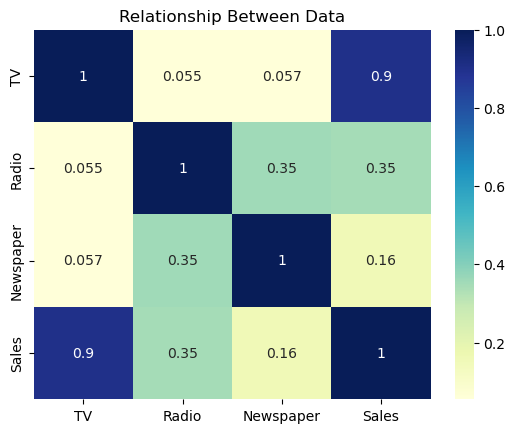

In [28]:
figsize=(9,7)
sns.heatmap(Sales.corr(),annot=True,cmap='YlGnBu')#annot show relation
plt.title('Relationship Between Data')
plt.show()

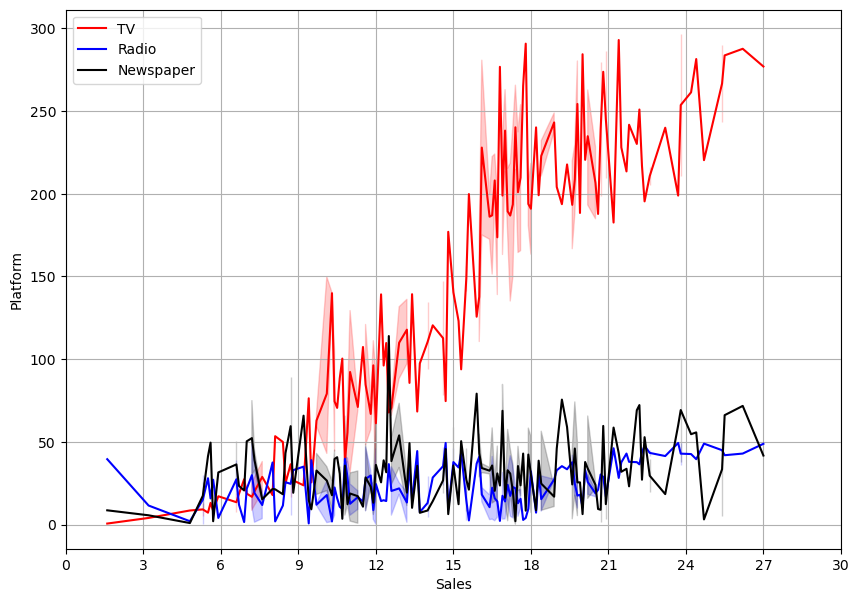

In [33]:
plt.figure(figsize=(10,7))

sns.lineplot(x='Sales',y='TV',data=Sales,color='r',label='TV')
sns.lineplot(x='Sales',y='Radio',data=Sales,color='blue',label='Radio')
sns.lineplot(x='Sales',y='Newspaper',data=Sales,color='black',label='Newspaper')
plt.xlabel('Sales')
plt.xticks(np.arange(0,33,3))
plt.ylabel('Platform')

plt.grid()
plt.show()

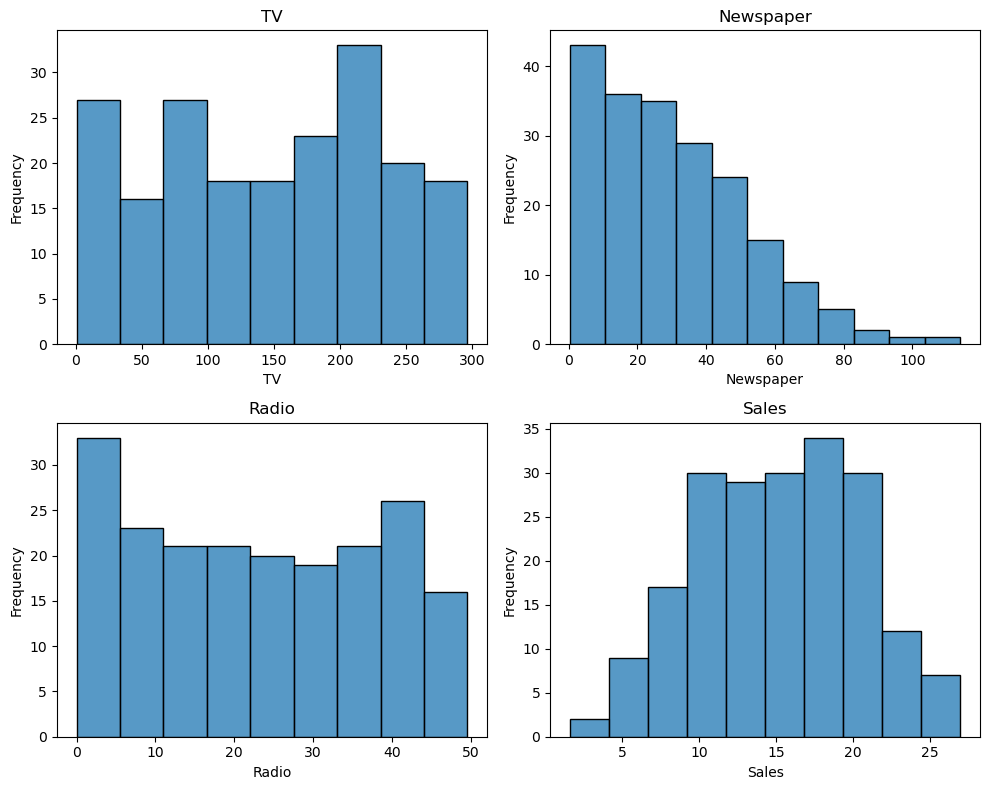

In [35]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))

sns.histplot(Sales['TV'],ax=ax[0][0])
ax[0][0].set_xlabel('TV')
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_title('TV')

sns.histplot(Sales['Newspaper'],ax=ax[0][1])
ax[0][1].set_xlabel('Newspaper')
ax[0][1].set_ylabel('Frequency')
ax[0][1].set_title('Newspaper')

sns.histplot(Sales['Radio'],ax=ax[1][0])
ax[1][0].set_xlabel('Radio')
ax[1][0].set_ylabel('Frequency')
ax[1][0].set_title('Radio')

sns.histplot(Sales['Sales'],ax=ax[1][1])
ax[1][1].set_xlabel('Sales')
ax[1][1].set_ylabel('Frequency')
ax[1][1].set_title('Sales')

plt.tight_layout()
plt.show()

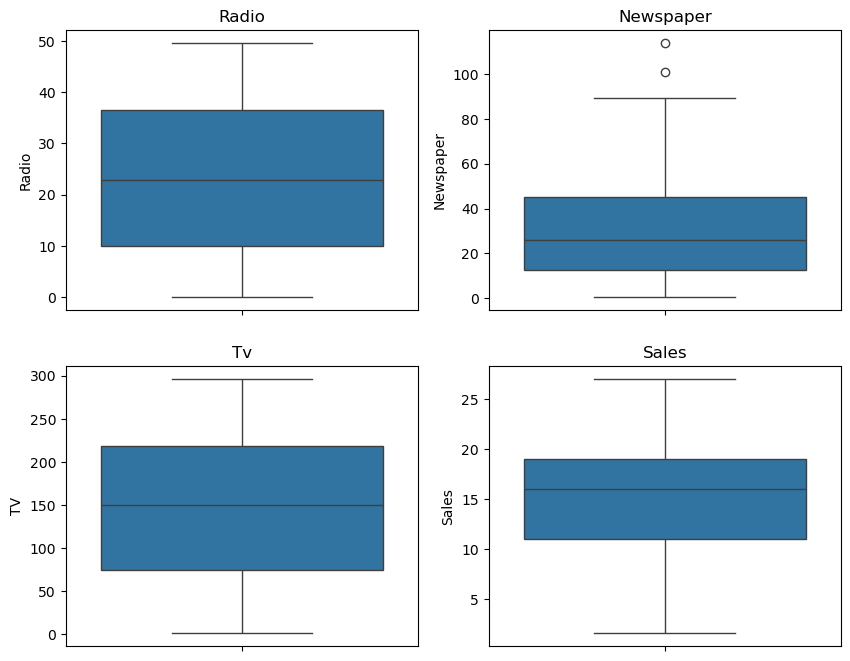

In [37]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))

sns.boxplot(Sales['Radio'],ax=ax[0][0])
ax[0][0].set_title('Radio')

sns.boxplot(Sales['Newspaper'],ax=ax[0][1])
ax[0][1].set_title('Newspaper')

sns.boxplot(Sales['TV'],ax=ax[1][0])
ax[1][0].set_title('Tv')

sns.boxplot(Sales['Sales'],ax=ax[1][1])
ax[1][1].set_title('Sales')

plt.show()

In [39]:
def quant(df,col,dis):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    
    low=q1-(iqr*dis)
    upp=q3+(iqr*dis)
    return low,upp

In [45]:
lower,upper=quant(Sales,'Newspaper',1.5)

In [47]:
out=(Sales['Newspaper']<lower) | (Sales['Newspaper']>upper)


In [49]:
Sales['Newspaper'][out].count()


2

In [51]:
Sales=Sales[~out]
Sales.shape

(198, 4)

In [53]:
# Machine Learning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [55]:
x=Sales.drop('Sales',axis=1)


In [61]:
y=Sales['Sales']

In [63]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.3,random_state=42)


In [65]:
LR=LinearRegression()
LR.fit(trainx,trainy)
pre_test=LR.predict(testx)
pre_train=LR.predict(trainx)

In [67]:
print('Accuarcy on Testing',r2_score(testy,pre_test))
print('Accuarcy on Training',r2_score(trainy,pre_train))

Accuarcy on Testing 0.9151626818586047
Accuarcy on Training 0.8905033650164197


In [69]:
kf=F=KFold(n_splits=5,random_state=43,shuffle=True)
cv=cross_val_score(LR,x,y,cv=kf,n_jobs=-1)
print('Accuracy : ',cv.mean()*100)

Accuracy :  89.29787896667068


In [71]:
rkf=RepeatedKFold(n_splits=5,n_repeats=15,random_state=5)
cv1=cross_val_score(LR,x,y,cv=rkf,n_jobs=-1)
print('Accuracy : ',cv1.mean()*100)

Accuracy :  88.93013860665874


In [73]:
RL=Ridge()
RL.fit(trainx,trainy)
pre_test_r=RL.predict(testx)
pre_train_r=RL.predict(trainx)

In [75]:
print('Accuarcy on Testing',r2_score(testy,pre_test_r))
print('Accuarcy on Training',r2_score(trainy,pre_train_r))

Accuarcy on Testing 0.9151615807367005
Accuarcy on Training 0.8905033649212801


In [77]:
kf=F=KFold(n_splits=5,random_state=43,shuffle=True)
cv3=cross_val_score(RL,x,y,cv=kf,n_jobs=-1)
print('Accuracy : ',cv3.mean()*100)

Accuracy :  89.29788025233655


In [79]:
rkf=RepeatedKFold(n_splits=5,n_repeats=15,random_state=5)
cv4=cross_val_score(RL,x,y,cv=rkf,n_jobs=-1)
print('Accuracy : ',cv4.mean()*100)

Accuracy :  88.93014423341027
